In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)
print(sns.__version__)

1.3.4
0.11.2


In [2]:
# Magic command để không cần gọi hàm plt.show()
%matplotlib inline

In [3]:
# Set kích thước mặc định cho các biểu đồ Seaborn
sns.set(rc={'figure.figsize':(7, 5)})

In [4]:
tip_df = sns.load_dataset('tips')
tip_df.columns = ['Tổng đơn', 'Tip', 'Giới tính', 'Hút thuốc', 'Ngày', 'Thời điểm', 'Số lượng']
tip_df 

,Tổng đơn,Tip,Giới tính,Hút thuốc,Ngày,Thời điểm,Số lượng
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# FacetGrid

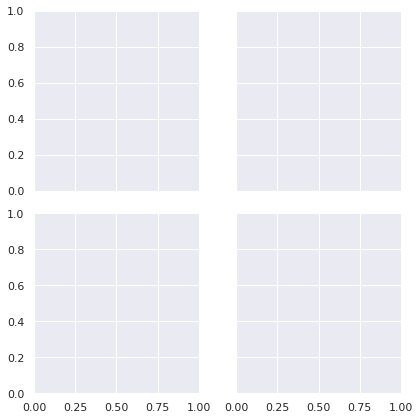

In [5]:
# Thử tạo lưới biểu đồ theo cột 'Hút thuốc' và 'Thời điểm'
bieudo1 = sns.FacetGrid(tip_df, col='Hút thuốc', row='Thời điểm') 

**Sử dụng hàm `map` để đổ dữ liệu lên biểu đồ**

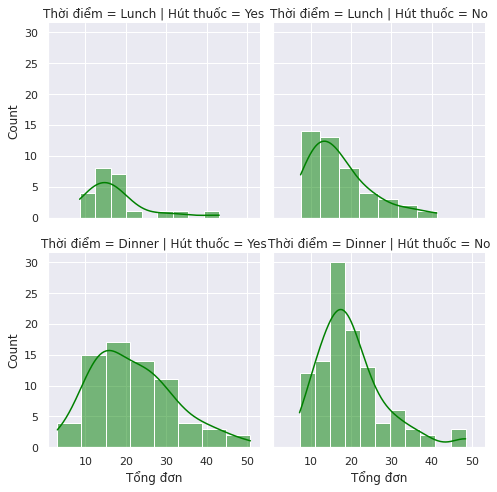

In [6]:
# Vẽ phân bố giá trị của 'Tổng đơn'
bieudo1 = sns.FacetGrid(tip_df, col='Hút thuốc', row='Thời điểm', height=3.5)
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', kde=True)
plt.tight_layout()

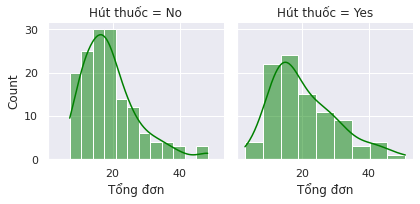

In [7]:
# Nếu chỉ muốn xem xét cột "Hút thuốc"
bieudo1 = sns.FacetGrid(tip_df, col='Hút thuốc', col_order=['No', 'Yes'])
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', kde=True)

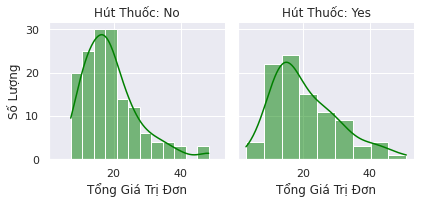

In [8]:
# Thực hiện thay đổi title của subplot theo 'col_name'
bieudo1 = sns.FacetGrid(tip_df, col='Hút thuốc', col_order=['No', 'Yes'])
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', kde=True)
bieudo1.set_axis_labels('Tổng Giá Trị Đơn', 'Số Lượng')
bieudo1.set_titles('Hút Thuốc: {col_name}')

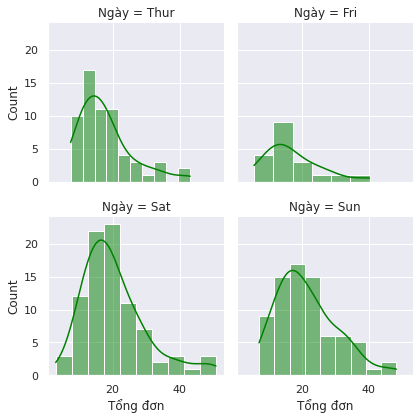

In [9]:
# Chia lưới theo ngày 
bieudo1 = sns.FacetGrid(tip_df, col='Ngày', col_wrap=2)
bieudo1.map(sns.histplot, 'Tổng đơn', color='green', kde=True)

**Mapping cho scatterplot**

<Figure size 504x504 with 0 Axes>

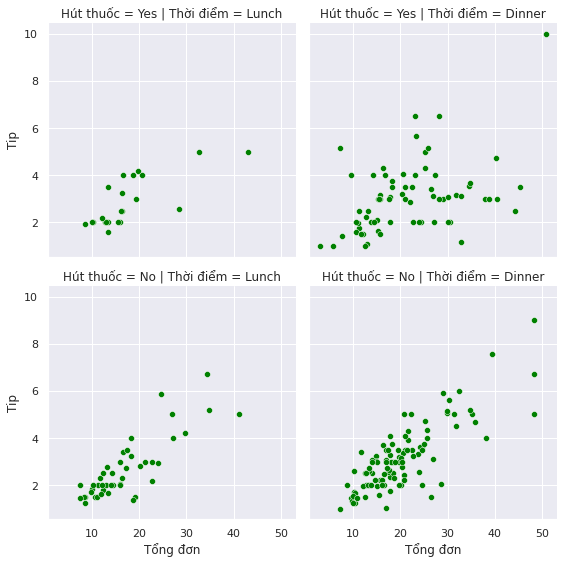

In [26]:
# Vẽ biểu đồ scatter
fig = plt.figure(figsize=(7,7))
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc', 
                        height=4, aspect=1)
bieudo2.map(sns.scatterplot, 'Tổng đơn', 'Tip', color='green')
plt.tight_layout()

In [ ]:
# Tuy nhiên, hàm 'map' chưa được chuẩn hóa, nếu muốn thêm size sẽ KHÔNG work
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc')
bieudo2.map(sns.scatterplot, 'Tổng đơn', 'Tip', color='green', size='Số lượng')

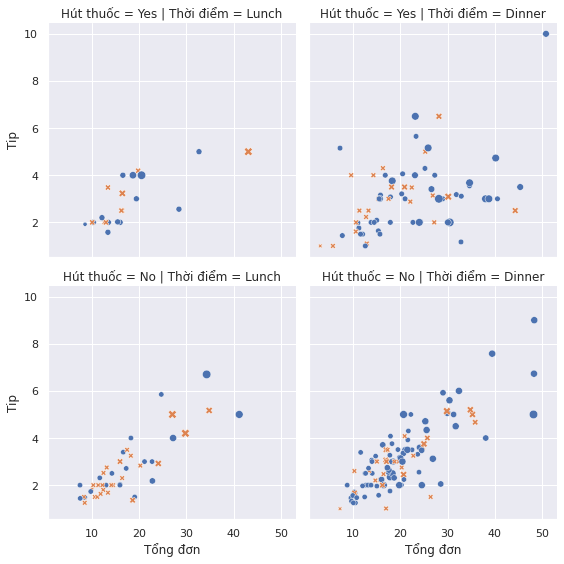

In [27]:
# Cần dùng hàm map_dataframe để đưa thêm thông tin
bieudo2 = sns.FacetGrid(tip_df, col='Thời điểm', row='Hút thuốc', height=4)
bieudo2.map_dataframe(sns.scatterplot, 'Tổng đơn', 'Tip', 
                      size='Số lượng',
                      hue='Giới tính', style='Giới tính'
                     )

**Tạo FacetGrid bằng các hàm Figure-Level**

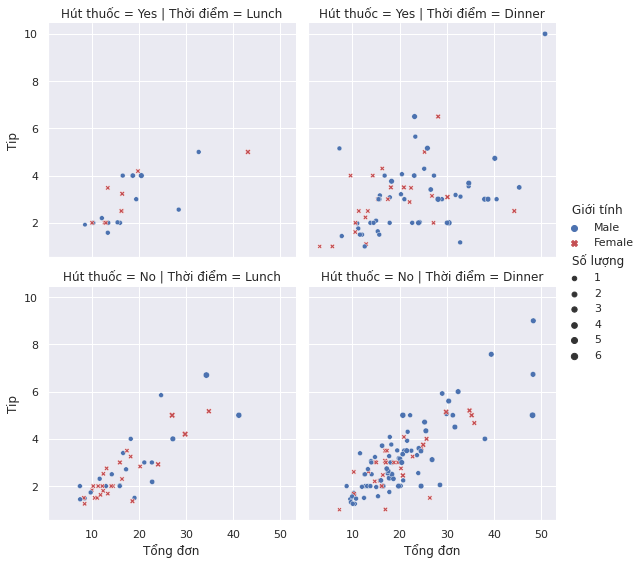

In [15]:
# Sử dụng hàm relplot để tạo grid
sns.relplot(height=4,
    data=tip_df, x="Tổng đơn", y="Tip", col="Thời điểm", row='Hút thuốc',
    hue="Giới tính", size="Số lượng", style="Giới tính",
    palette=["b", "r"], sizes=(20, 40)
)

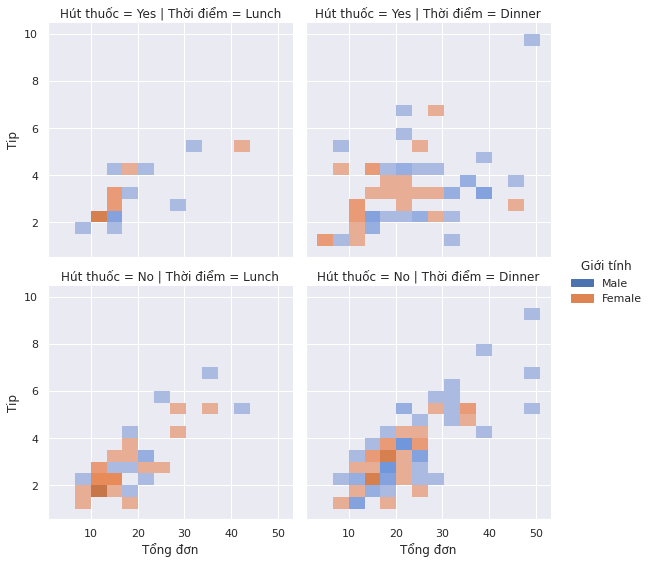

In [18]:
# Sử dụng hàm displot để tạo grid
sns.displot(height=4,
    data=tip_df, x="Tổng đơn", y="Tip", col="Thời điểm", row='Hút thuốc',
    hue="Giới tính",
)

# PairPlot and PairGrid

**PairPlot**

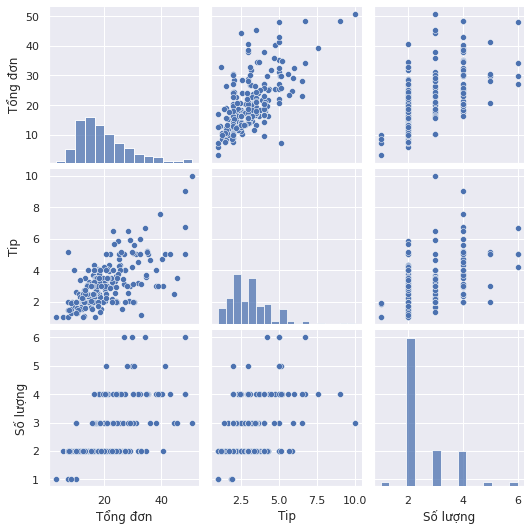

In [28]:
bieudo = sns.pairplot(tip_df)

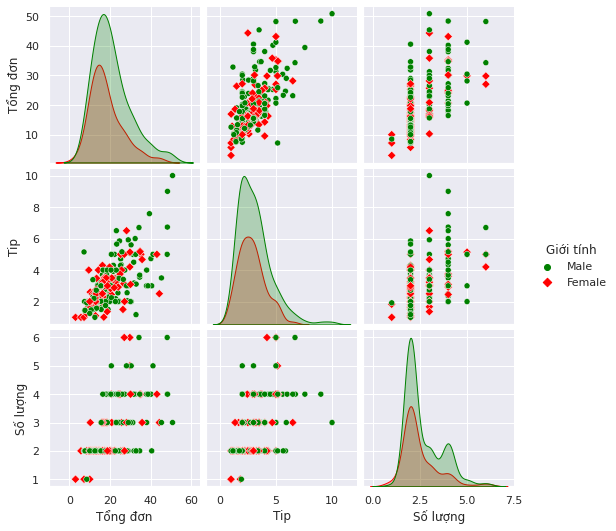

In [29]:
bieudo = sns.pairplot(tip_df, hue='Giới tính', 
                      markers=['o', 'D'], 
                      palette=['green', 'red'])

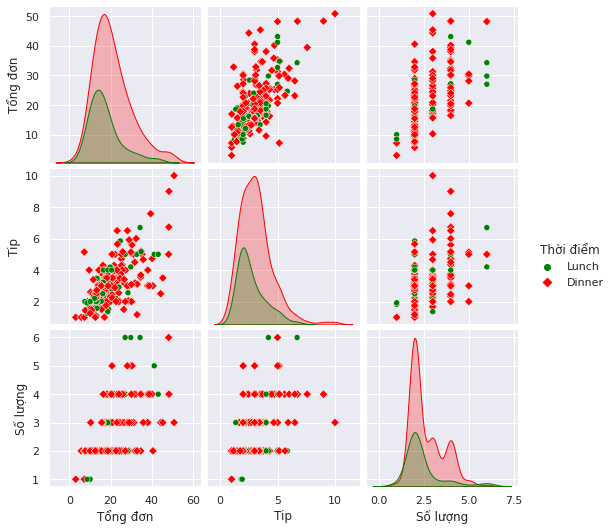

In [30]:
bieudo = sns.pairplot(tip_df, hue='Thời điểm', 
                      markers=['o', 'D'], 
                      palette=['green', 'red'])

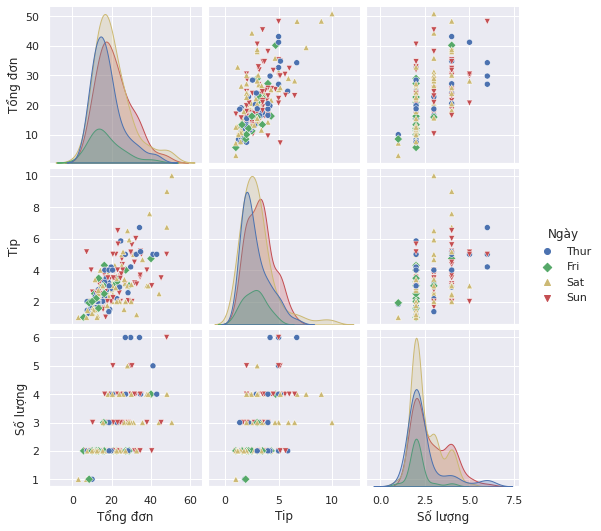

In [31]:
bieudo = sns.pairplot(tip_df, hue='Ngày', 
                      markers=['o','D','^','v'], 
                      palette=['b','g','y','r'])

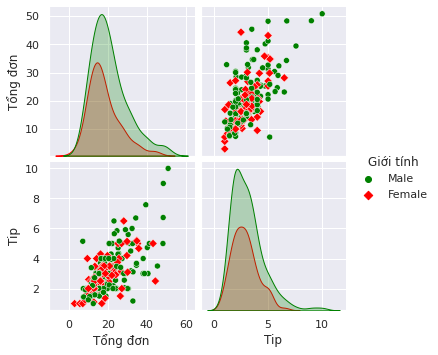

In [32]:
# Chọn một số cột
bieudo = sns.pairplot(tip_df, vars=['Tổng đơn', 'Tip'], 
                      hue='Giới tính', markers=['o', 'D'], 
                      palette=['green', 'red'])

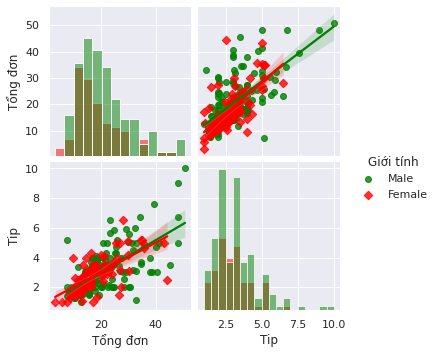

In [35]:
# Thay đổi hiển thị của các biểu đồ đường chéo và phần còn lại
bieudo = sns.pairplot(tip_df, vars=['Tổng đơn', 'Tip'], 
                      hue='Giới tính', markers=['o', 'D'], 
                      palette=['green', 'red'],
                      diag_kind='hist', kind='reg',
                     )

# PairGrid

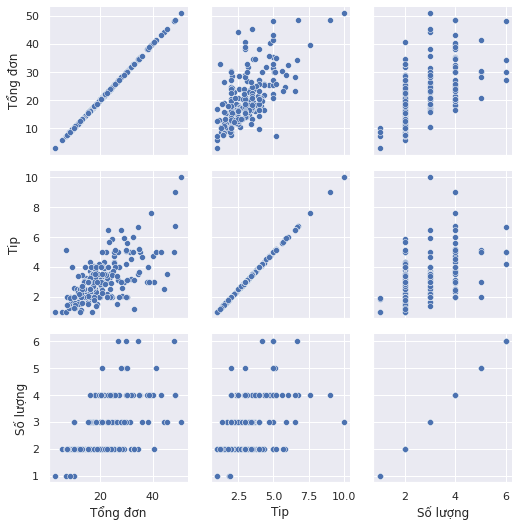

In [36]:
grid1 = sns.PairGrid(tip_df)
grid1.map(sns.scatterplot)

**Chọn một số cột bằng tham số `vars`**

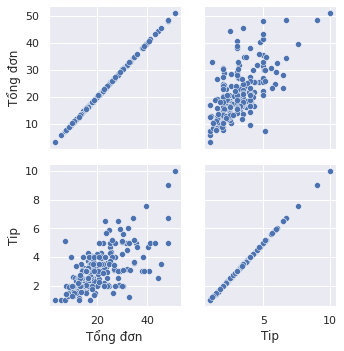

In [37]:
grid1 = sns.PairGrid(tip_df, vars=['Tổng đơn', 'Tip'])
grid1.map(sns.scatterplot)

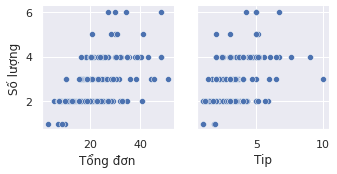

In [38]:
# Dùng x_vars và y_vars
grid1 = sns.PairGrid(tip_df,
                     x_vars=['Tổng đơn', 'Tip'],
                     y_vars=['Số lượng']
                    )
grid1.map(sns.scatterplot)

**Sử dụng hàm `.map_diag()` và `.map_offdiag()`**

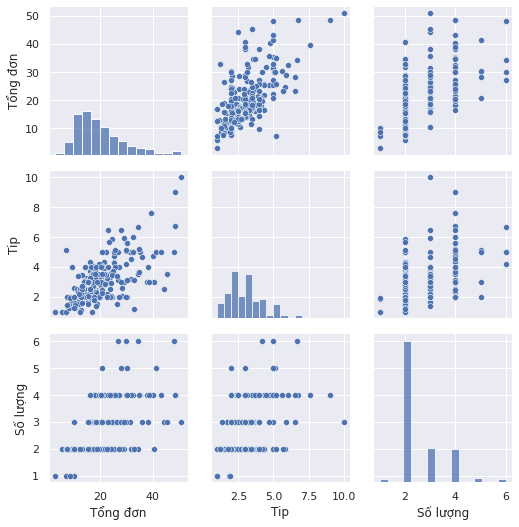

In [39]:
grid1 = sns.PairGrid(tip_df)
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)

**Sử dụng hàm `.map_upper()` và `.map_lower()`**

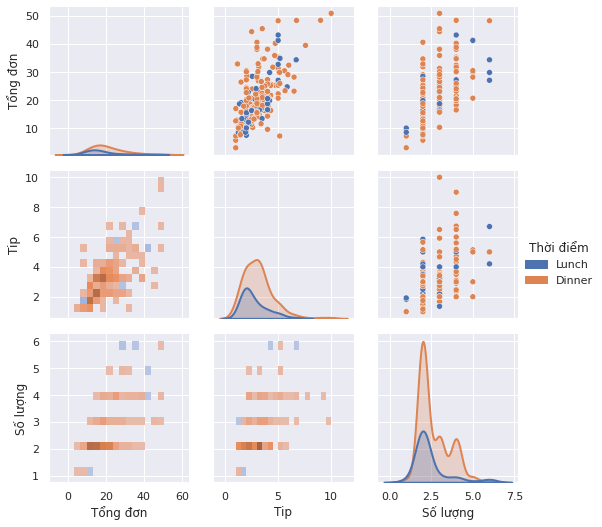

In [40]:
grid1 = sns.PairGrid(tip_df, corner=False, hue='Thời điểm')
grid1.map_upper(sns.scatterplot)
grid1.map_diag(sns.kdeplot, fill=True, lw=2)
grid1.map_lower(sns.histplot)
grid1.add_legend()